# ASTR 310 Lecture 20 - Images 1

### Exercise 1: read an image, create a cutout, and examine histogram   

Download the file `ibkf10020_drz.fits` from the Canvas site. This is a Hubble Space Telescope Wide Field Camera 3 (WFC3) image of the remnant of supernova 1987a in the “wide Hα + [N II]” filter (F657N).  

**1.)** Read in the file and store the first image as a `CCDData` object. The image header has `BUNIT = 'ELECTRONS/S'`, but this doesn't correspond to a valid AstroPy unit, so set the unit to `1/s`. [3 pts]



In [2]:
from astropy.nddata import CCDData
import matplotlib.pyplot as plt
from astropy.nddata import Cutout2D
from astropy.coordinates import SkyCoord
import astropy.units as u
import numpy as np

In [3]:
img = CCDData.read("ibkf10020_drz.fits", unit='1/s')

INFO: first HDU with data is extension 1. [astropy.nddata.ccddata]
INFO: using the unit 1/s passed to the FITS reader instead of the unit ELECTRONS/S in the FITS file. [astropy.nddata.ccddata]


**2.)** Cut out a 2 by 2.5 arcsec region around the coordinates RA = 05h35m28.09s, Dec = -69d16m10.85s. [2 pts]


<WCSAxes: >

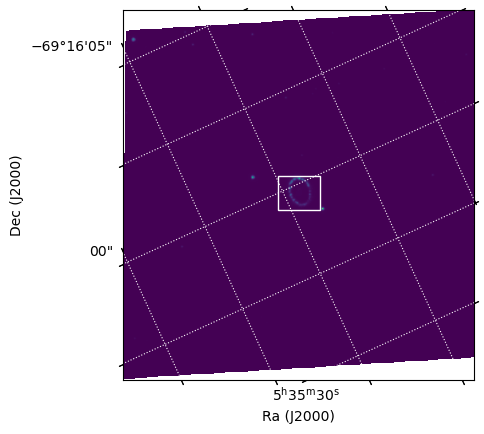

In [4]:
plt.subplot(projection=img.wcs)
plt.imshow(img, origin='lower')
plt.grid(color='white', ls='dotted')
plt.xlabel("Ra (J2000)")
plt.ylabel("Dec (J2000)")

center = SkyCoord('05h35m28.09s -69d16m10.85s')
size = np.array([2, 2.5]) * u.arcsec

cut = Cutout2D(img.data, center, size, wcs=img.wcs)
cut.plot_on_original(color='white')

**3.)** Now plot two histograms of the cutout data values.  You will need to flatten or ravel the 2D array into a 1D array to get what we want out of `plt.hist()`. The first histogram plot should be based on the raw data values (call them $X$), and the second should be based on

   $$
   Y = \frac{\log(1000X + 1)}{\log 1001}
   $$

Use 100 bins. [5 pts]

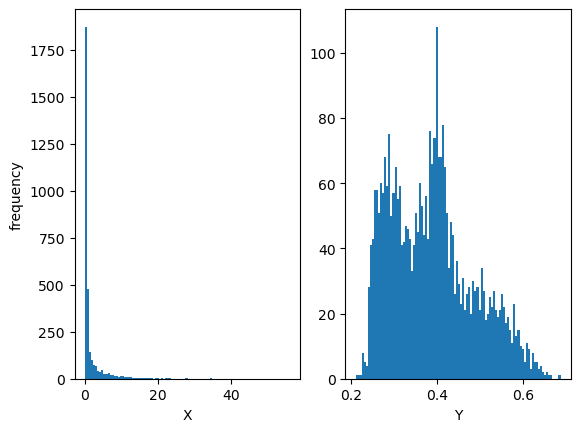

In [5]:
x = cut.data.flatten()
y = np.log10(1000*x + 1) / np.log(1001)

fig = plt.Figure()
ax = fig.subplots(1,2)
ax[0].hist(x, bins=100)
ax[0].set_xlabel("X")
ax[0].set_ylabel("frequency")
ax[1].hist(y, bins=100)
ax[1].set_xlabel("Y")
fig

### Exercise 2: plot the image and cutout

Plot the image using the correct WCS, using a logarithmic stretch.  Plot the outline of the cutout region on the main image and display the cutout in its own subplot.  You should be able to produce a plot like the one in the lecture slides pdf. [6 pts]


/var/folders/41/_gkgvhb94wd4156zplzr4cg00000gn/T/ipykernel_67797/839084728.py:4: RuntimeWarning: invalid value encountered in log10
  ax1.imshow(np.log10(img.data), origin='lower', vmin=-3, vmax=0.2, cmap='inferno')


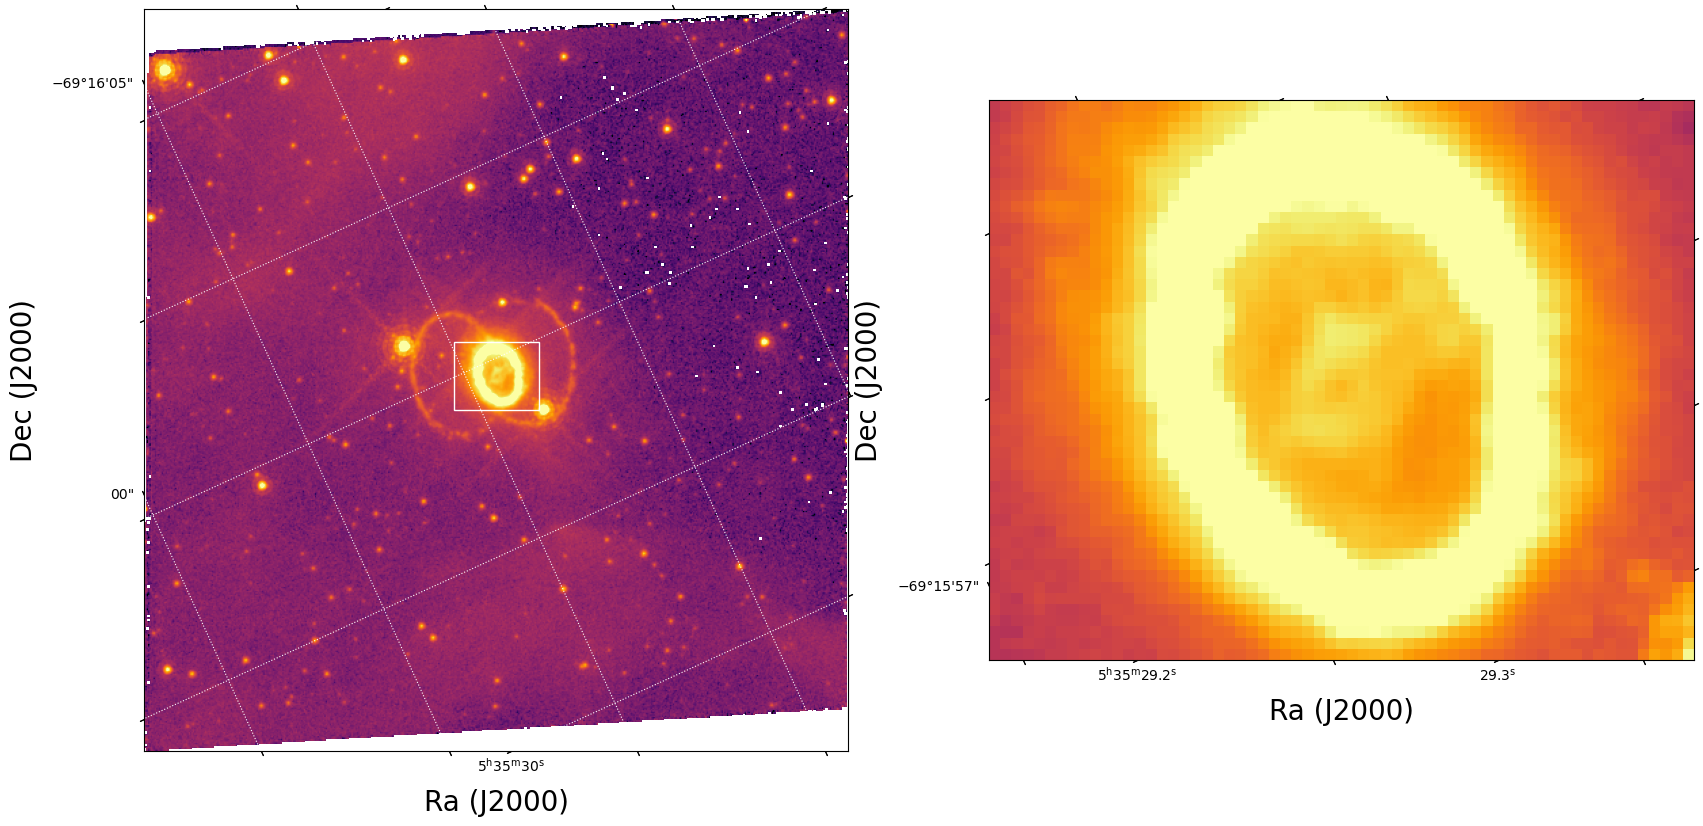

In [30]:
fig2 = plt.figure(figsize=(20,20))
ax1 = fig2.add_subplot(121, projection=img.wcs)

ax1.imshow(np.log10(img.data), origin='lower', vmin=-3, vmax=0.2, cmap='inferno')
ax1.grid(color='white', ls='dotted')
ax1.set_xlabel("Ra (J2000)", fontdict={'fontsize': 20})
ax1.set_ylabel("Dec (J2000)", fontdict={'fontsize': 20})
cut.plot_on_original(color='white')

ax2 = fig2.add_subplot(122, projection=img.wcs)
ax2.imshow(np.log10(cut.data), vmin=-3, vmax=0.2, cmap='inferno')
ax2.set_xlabel("Ra (J2000)", fontdict={'fontsize': 20})
ax2.set_ylabel("Dec (J2000)", fontdict={'fontsize': 20})

### Exercise 3: further analysis  

Take the cutout data from the SN1987a image and perform the following analysis on the unstretched cutout data.  
**1.)** Create a calibrated copy of the cutout region: convert the cutout data to erg $cm^{-2}$ $s^{-1}$ Å$^{-1}$ $pixel^{-1}$ by multiplying by the image header's `PHOTFLAM` value, which is given in `erg/cm^2/Angstrom` per electron (see note on exercise 1).  
    
**2.)** Compute and print the sum of the pixels in the cutout region with values greater than `PHOTFLAM`. This is a crude estimate of the flux in the bright inner ring. You should get something like this:

<samp>total flux in ring = 9.978624e-15 erg/s/cm^2/Angstrom<samp>

[4 pts]

In [45]:
photflam = img.header['PHOTFLAM']

calibrated = cut.data * photflam

total_flux = np.sum(calibrated[calibrated > photflam]) * u.erg / u.second / u.cm**2 / u.Angstrom

print(f"total flux in ring = {total_flux}")

total flux in ring = 9.97224763703286e-15 erg / (Angstrom s cm2)
